<a href="https://colab.research.google.com/github/Onethybeing/pytorch_implementation/blob/main/yoloimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.9/112.6 GB disk)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
def show_image(image_path):
  image = cv2.imread(image_path)
  if image is None:
    print("Error :image not found!")
    return
  cv2_imshow(image)


In [ ]:
#Nano model
#run inference
!yolo predict model = yolo11s.pt source ='/content/WIN_20240915_18_12_39_Pro.jpg'

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs

image 1/1 /content/WIN_20240915_18_12_39_Pro.jpg: 384x640 3 persons, 45.7ms
Speed: 2.7ms preprocess, 45.7ms inference, 167.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


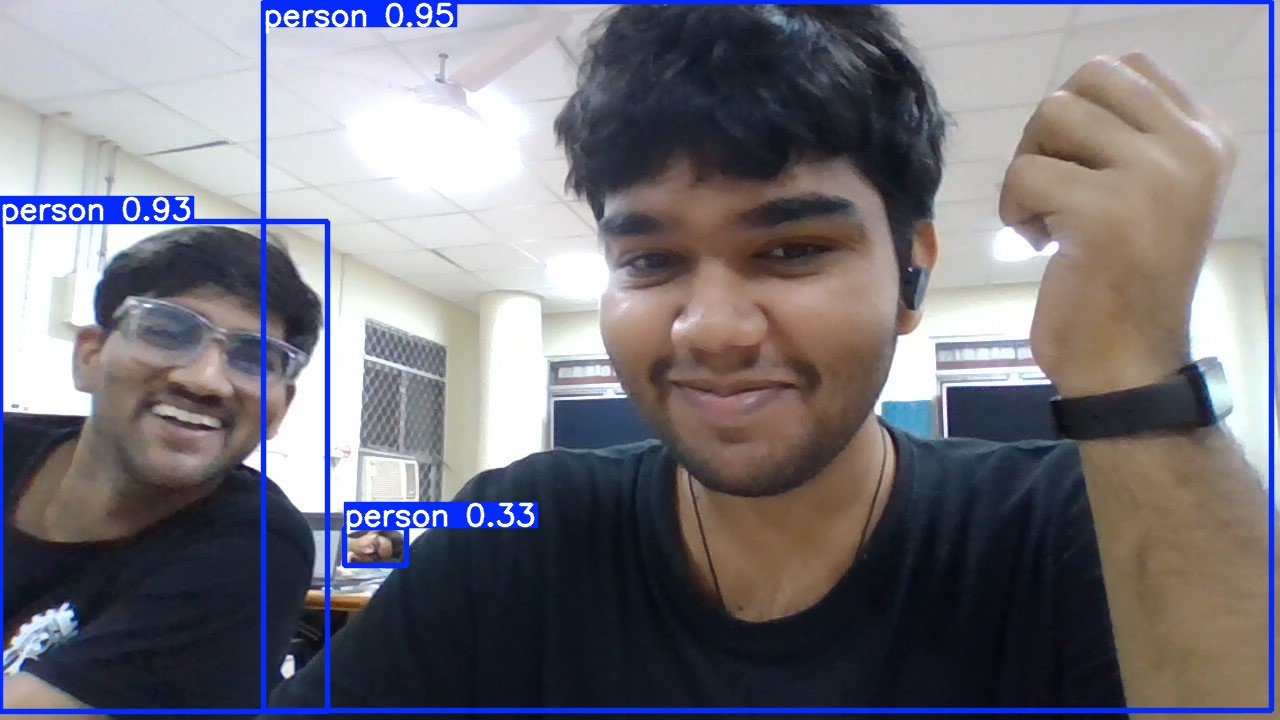

In [ ]:
show_image('/content/runs/detect/predict4/WIN_20240915_18_12_39_Pro.jpg')

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-btbmeiry
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-btbmeiry
  Resolved https://github.com/facebookresearch/detectron2.git to commit 18f69583391e5040043ca4f4bebd2c60f0ebfde0
  Preparing metadata (setup.py) ... done
  Using cached yacs-0.1.8-py3-none-any.whl.metadata (639 bytes)
  Using cached fvcore-0.1.5.post20221221.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached iopath-0.1.9-py3-none-any.whl.metadata (370 bytes)
  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached black-25.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (81 kB)
  Using cached portalocker-3.2.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pathspec-0.12.1-py3-none-any.whl.metadata (21

In [ ]:
# Ensure GPU runtime
!nvidia-smi

# Install PyTorch (Colab usually already has it)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install Detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install additional dependencies
!pip install opencv-python pycocotools matplotlib

# Verify installation
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import torch
print("CUDA available:", torch.cuda.is_available())


Wed Aug 13 16:22:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import detectron2
!nvcc --version
TORCH_VERSION =".".join(torch.__version__.split(".")[:2])
CUDA_VERSION =torch.__version__.split("+")[-1]
print("torch: ",TORCH_VERSION,"; curda: ",CUDA_VERSION)
print("detectron2:",detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.6 ; curda:  cu124
detectron2: 0.6


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np

import os,json,cv2,random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor  # prediction engine and training engine
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

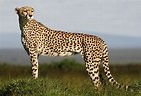

In [ ]:
!wget https://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("/content/cheet.jpeg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[08/13 17:11:30 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_C4_3x/137849393/model_final_f97cb7.pkl ...


In [ ]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([14], device='cuda:0')
Boxes(tensor([[15.3451,  6.5139, 91.1015, 82.0770]], device='cuda:0'))


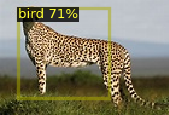

In [ ]:
v = Visualizer(im[:,:,::-1],MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:,:,::-1])

prepare the dataset

In [ ]:
!wget
!un